In [1]:
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import torchvision.transforms as transform
from torch.utils.data import DataLoader,Dataset
from torch.autograd import Variable
import numpy as np
import pandas as pd

In [2]:
print(torch.__version__)

0.4.1.post2


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
import matplotlib.pyplot as plt

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 1060
Memory Usage:
Allocated: 0.0 GB
Cached:    0.1 GB


In [6]:
num_epochs= 100
batch_size = 100
learning_rate = 0.001

In [7]:
class FashionMNISTDataset(Dataset):
    def __init__(self,csv_file,transform=None):
        data = pd.read_csv(csv_file)
        self.X = np.array(data.iloc[:,1:]).reshape(-1,1,28,28).astype(float)
        self.Y = np.array(data.iloc[:,0])
        self.transform = transform
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        item = self.X[idx]
        label = self.Y[idx]
        if self.transform:
            item = self.transform
        return item,label

In [8]:
train_dataset = FashionMNISTDataset(csv_file='data/fashion-mnist_train.csv')
test_dataset = FashionMNISTDataset(csv_file='data/fashion-mnist_test.csv')

In [9]:
train_loader = DataLoader( dataset = train_dataset
                , shuffle = True
                , batch_size = batch_size
            )
test_loader = DataLoader( dataset = test_dataset
                        , shuffle = True
                         , batch_size = batch_size
                        )

In [10]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

In [11]:
len(train_dataset[1])

2

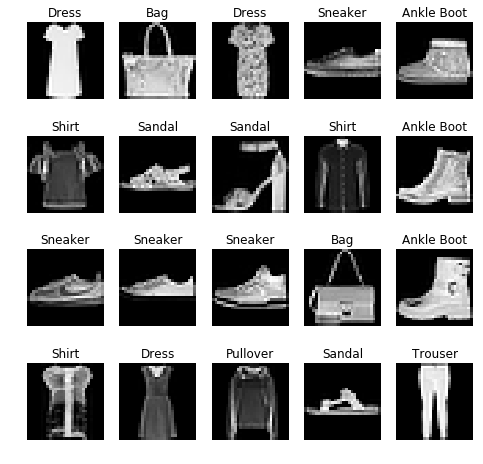

In [12]:
fig = plt.figure(figsize=(8,8))
columns = 5
rows = 4
for i in range(columns*rows):
    index = np.random.randint(len(train_dataset))
    img = train_dataset[index][0][0,:,:]
    fig.add_subplot(rows,columns,i+1)
    plt.title(labels_map[train_dataset[index][1]])
    plt.axis('off')
    plt.imshow(img,cmap='gray')
plt.show()

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,16,kernel_size=5,padding=2)
            , nn.BatchNorm2d(16)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32,kernel_size=5,padding=2)
            , nn.BatchNorm2d(32)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(7*7*32,10)
    def forward(self,X):
        out = self.layer1(X)
        out = self.layer2(out)
        out = out.view(out.size(0),-1)
        out = self.fc(out)
        return out

In [14]:
cnn = CNN()
cnn.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(),lr=learning_rate)

In [15]:
losses = []
import time
a = time.clock()
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.data)
        if (i+1) == 100 and (epoch+1)%5==0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))
print(time.clock()-a)
            

Epoch : 5/100, Iter : 100/600,  Loss: 0.1072
Epoch : 10/100, Iter : 100/600,  Loss: 0.2438
Epoch : 15/100, Iter : 100/600,  Loss: 0.1380
Epoch : 20/100, Iter : 100/600,  Loss: 0.1307
Epoch : 25/100, Iter : 100/600,  Loss: 0.0769
Epoch : 30/100, Iter : 100/600,  Loss: 0.0489
Epoch : 35/100, Iter : 100/600,  Loss: 0.0617
Epoch : 40/100, Iter : 100/600,  Loss: 0.0205
Epoch : 45/100, Iter : 100/600,  Loss: 0.0221
Epoch : 50/100, Iter : 100/600,  Loss: 0.0350
Epoch : 55/100, Iter : 100/600,  Loss: 0.0113
Epoch : 60/100, Iter : 100/600,  Loss: 0.0131
Epoch : 65/100, Iter : 100/600,  Loss: 0.0083
Epoch : 70/100, Iter : 100/600,  Loss: 0.0078
Epoch : 75/100, Iter : 100/600,  Loss: 0.0139
Epoch : 80/100, Iter : 100/600,  Loss: 0.0015
Epoch : 85/100, Iter : 100/600,  Loss: 0.0118
Epoch : 90/100, Iter : 100/600,  Loss: 0.0036
Epoch : 95/100, Iter : 100/600,  Loss: 0.0097
Epoch : 100/100, Iter : 100/600,  Loss: 0.0035
842.4245520000001
